In [2]:
%matplotlib inline
import pandas

In [3]:
my_coin_tosses = "thttthhh"
heads = len([x for x in my_coin_tosses if x =='h'])
heads

4

In [4]:
heads = list(my_coin_tosses).count('h')
heads

4

In [7]:
my_coin_tosses_series = pandas.Series(list(my_coin_tosses))
my_coin_tosses_series

0    t
1    h
2    t
3    t
4    t
5    h
6    h
7    h
dtype: object

In [71]:
my_coin_tosses_series.map(d.get)

0    0
1    1
2    0
3    0
4    0
5    1
6    1
7    1
dtype: int64

In [72]:
type(my_coin_tosses_series.map(d.get))

pandas.core.series.Series

In [8]:
(my_coin_tosses_series == 'h').value_counts()

True     4
False    4
dtype: int64

In [9]:
import statsmodels

In [10]:
import statsmodels.stats.weightstats

In [11]:
import statsmodels.stats.proportion

In [12]:
statsmodels.stats.proportion.proportions_ztest(4,8,value=0.5)

(0.0, 1.0)

In [13]:
statsmodels.stats.proportion.proportions_ztest(23,40,value=0.5)

(0.9595395315108014, 0.33728701473435396)

In [15]:
statsmodels.stats.proportion.proportions_ztest(5,8,value=0.5)

(0.73029674334022143, 0.46520881845214179)

In [14]:
statsmodels.stats.proportion.proportions_ztest(5,8,value=0.5,alternative='smaller')

(0.73029674334022143, 0.76739559077392916)

In [ ]:
#p of getting 5 or less

In [16]:
statsmodels.stats.proportion.proportions_ztest(5,8,value=0.5,alternative='larger')

(0.73029674334022143, 0.2326044092260709)

In [17]:
statsmodels.stats.proportion.proportions_ztest(3,8,value=0.5,alternative='smaller')

(-0.73029674334022143, 0.2326044092260709)

In [18]:
statsmodels.stats.proportion.proportions_ztest(4,8,value=0.5,alternative='larger')

(0.0, 0.5)

# z-test

In [36]:
d = {'h':1, 't':0}
my_coin_tosses_series.map(d.get)

<function get>

In [35]:
statsmodels.stats.weightstats.ztest(my_coin_tosses_series.map(d.get),value=0.5)

(0.0, 1.0)

Lets compare two coin toss results
if we dont know the underlying distribution, but we know that it should be normal then we can use a t-test

In [66]:
other_tosses = pandas.Series([1,1,1,1,0,0,0,0])
numbered_my_coin_tosses = my_coin_tosses_series.map(d.get)
statsmodels.stats.weightstats.ttest_ind(numbered_my_coin_tosses,other_tosses)

(0.0, 1.0, 14.0)

In [73]:
import scipy
import scipy.stats
import numpy
scipy.stats.ttest_ind(numbered_my_coin_tosses,other_tosses)

Ttest_indResult(statistic=0.0, pvalue=1.0)

Mann-Whitney U-test makes almost no assumptions at all

In [75]:
scipy.stats.mannwhitneyu(numbered_my_coin_tosses,other_tosses)

MannwhitneyuResult(statistic=32.0, pvalue=0.95174517894843647)

# Monte_Carlo simulation

In [31]:
import random
simulation = []
for i in range(1000):
    heads = 0
    for j in range(8):
        this_toss = random.randint(0,1)
        if this_toss == 1:
            heads +=1
    simulation.append(heads)
    

In [32]:
simulation_series = pandas.Series(simulation)
simulation_series.value_counts()

4    258
3    231
5    227
2    118
6    105
1     29
7     22
8      6
0      4
dtype: int64

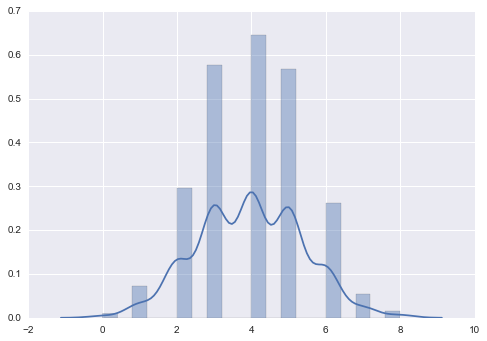

In [37]:
import seaborn
seaborn.distplot(simulation_series)

In [76]:
import matplotlib.pyplot

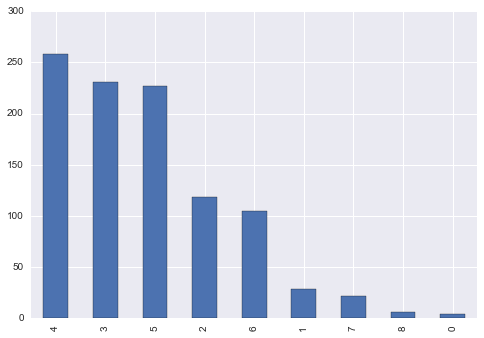

In [77]:
simulation_series.value_counts().plot.bar()

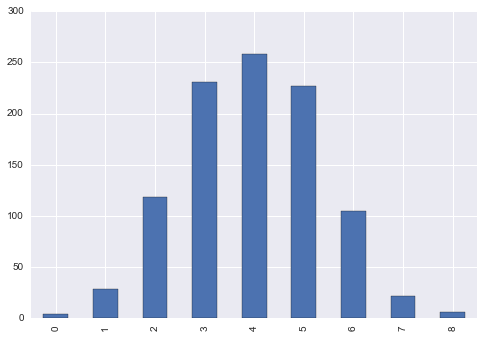

In [78]:
simulation_series.value_counts(sort=False).plot.bar()

In [ ]:
simulation_series.value_counts().plot.bar()

# Forcing normality

In [38]:
trains = pandas.read_csv('sydtrains.csv',index_col=1,thousands=',')

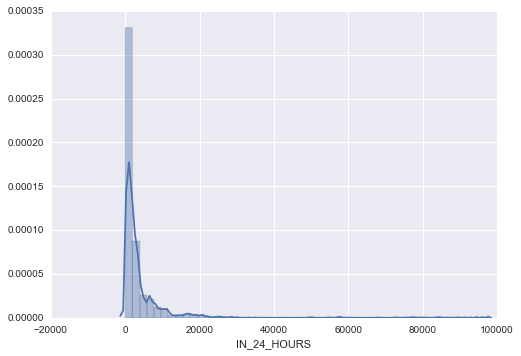

In [40]:
import seaborn
seaborn.distplot(trains.IN_24_HOURS)

In [41]:
trains.IN_24_HOURS.mean()

3239.97920997921

In [42]:
trains.IN_24_HOURS.median()

980.0

In [43]:
trains.IN_24_HOURS.mode()

0    10
dtype: int64

In [44]:
trains.IN_24_HOURS.skew()

7.0257542095344467

In [45]:
trains.IN_24_HOURS.kurtosis()

60.536922834911415

In [54]:
grouped_means = []
for i in range(1000):
    grouped_means.append(trains.IN_24_HOURS.sample(100).mean())


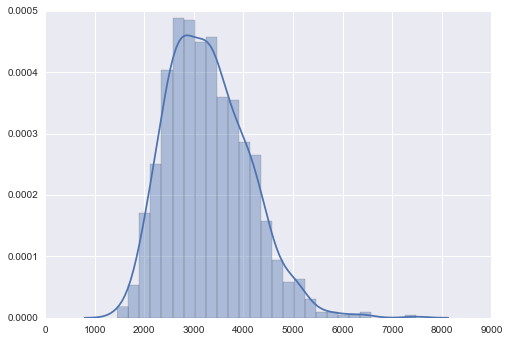

In [55]:
grouped_means_series = pandas.Series(grouped_means)
seaborn.distplot(grouped_means_series)

In [56]:
print grouped_means_series.mean()
print grouped_means_series.median()
print grouped_means_series.std()
print grouped_means_series.std()
print grouped_means_series.skew()
print grouped_means_series.kurtosis()

3285.9395
3214.15
820.091995334
820.091995334
0.639379873745
0.733207989256


In [57]:
western_means = []
for i in range(25):
    western_means.append(trains[trains.LINE=='Western'].IN_24_HOURS.sample(100).mean())

In [60]:
statsmodels.stats.weightstats.ztest(western_means, value=grouped_means_series.mean())

(10.431510183462523, 1.7803587987684229e-25)

In [64]:
type(grouped_means_series)

pandas.core.series.Series

In [70]:
scipy.stats.mannwhitneyu(trains[trains.LINE=='North Shore'].IN_24_HOURS, trains[trains.LINE=='Western'].IN_24_HOURS)

MannwhitneyuResult(statistic=44907.5, pvalue=1.1696976313478965e-05)

In [79]:
type(grouped_means_series.mean())

float